In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [61]:
df = pd.read_excel('./E-Commerce-Dataset.xlsx', sheet_name='E Comm')

df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [62]:
df.shape

(5630, 20)

In [63]:
description = pd.read_excel('./E-Commerce-Dataset.xlsx', sheet_name='Data Dict', index_col=0)

description

,Unnamed: 1,Unnamed: 2,Unnamed: 3
NaN,Data,Variable,Discerption
NaN,E Comm,CustomerID,Unique customer ID
NaN,E Comm,Churn,Churn Flag
NaN,E Comm,Tenure,Tenure of customer in organization
NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
NaN,E Comm,CityTier,City tier
NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
NaN,E Comm,Gender,Gender of customer
NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [64]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [66]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [67]:
churn_rate = df['Churn'].value_counts()/len(df)*100

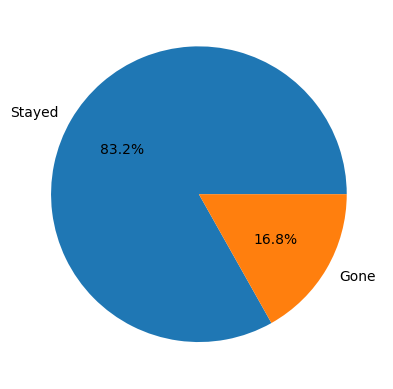

In [68]:
plt.pie(churn_rate, labels=['Stayed', 'Gone'], autopct='%1.1f%%')
plt.show()

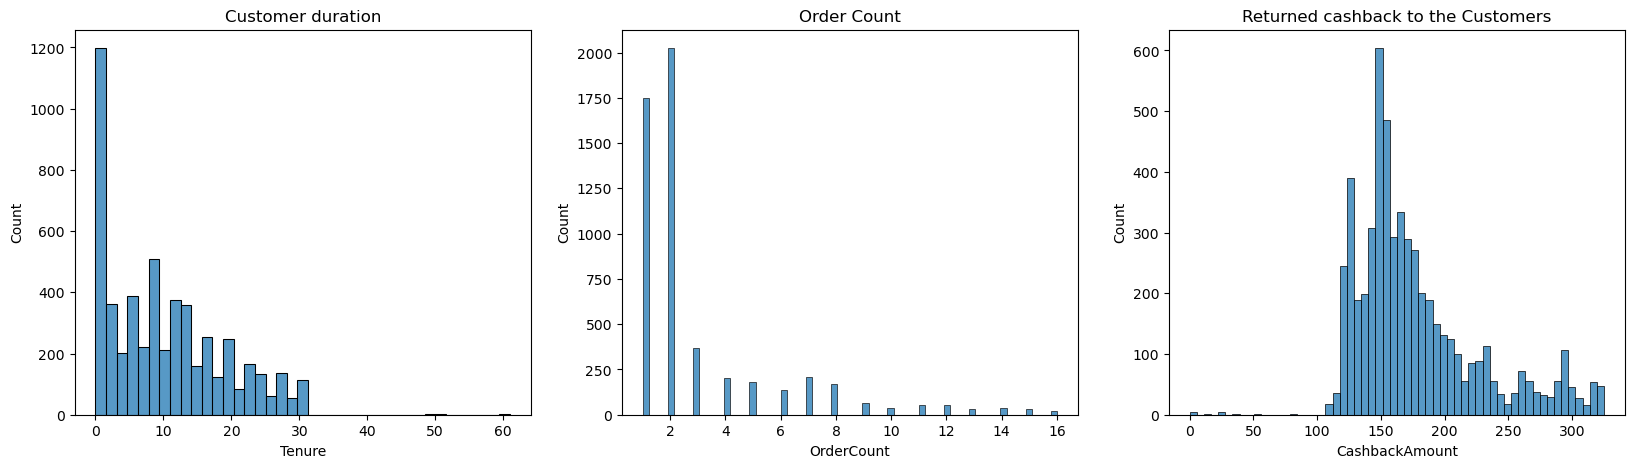

In [69]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))

# Tenure
sns.histplot(data=df, x='Tenure', ax=axes[0])
axes[0].set_title('Customer duration')

# Order Count
sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title('Order Count')

# Cashback
sns.histplot(data=df, x='CashbackAmount', ax=axes[2])
axes[2].set_title('Returned cashback to the Customers')

plt.show()

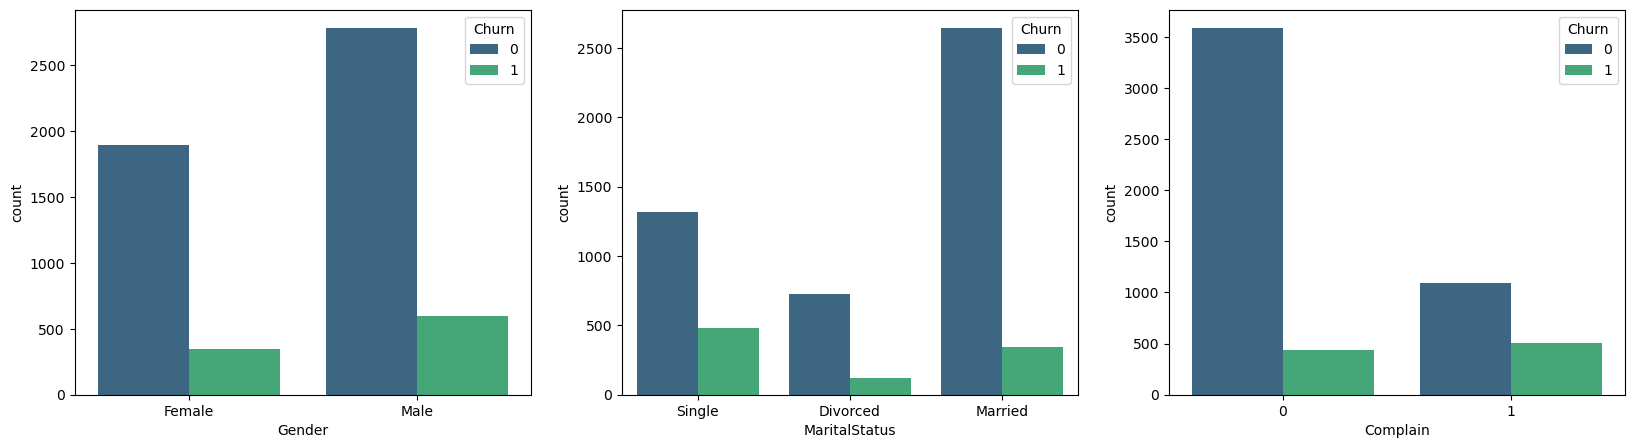

In [70]:
fig, axes = plt.subplots(1,3, figsize=(20, 5))

sns.countplot(data=df, x='Gender', hue='Churn', palette='viridis', ax=axes[0])
axes[0].set_title = 'Churn by Gender'

sns.countplot(data=df, x='MaritalStatus', hue='Churn', palette='viridis', ax=axes[1])
axes[1].set_title = 'Churn by Marital Status'

sns.countplot(data=df, x='Complain', hue='Churn', palette='viridis', ax=axes[2])
axes[2].set_title = 'Churn by Complains'

plt.show()

In [83]:
df.corrwith(df['Churn'], numeric_only=True).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [72]:
print('NaN values:', df.isna().sum().sum())
nan_rows = df[df.isna().any(axis=1)].shape[0]
print(f'Nan rows: {nan_rows}')
print(f'ratio of non-existent rows: {np.round(nan_rows/len(df)*100)}%')


NaN values: 1856
Nan rows: 1856
ratio of non-existent rows: 33.0%


In [73]:
data = df[['Churn', 'Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'SatisfactionScore', 'Gender', 'MaritalStatus']]

In [74]:
print('NaN values:', data.isna().sum().sum())
nan_rows = data[data.isna().any(axis=1)].shape[0]
print(f'Nan rows: {nan_rows}')
print(f'ratio of non-existent rows: {np.round(nan_rows/len(data)*100)}%')


NaN values: 571
Nan rows: 571
ratio of non-existent rows: 10.0%


### Nan values - bu o'zimizga bog'liq, 

hozircha tashlab yuboramiz

In [75]:
data = data.dropna()
data.shape

(5059, 8)

In [79]:
encoded = pd.get_dummies(data)
encoded.head(10)

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,SatisfactionScore,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,1,5.0,159.93,2,True,False,False,False,True
3,1,0.0,0,3.0,134.07,5,False,True,False,False,True
4,1,0.0,0,3.0,129.60,5,False,True,False,False,True
5,1,0.0,1,7.0,139.19,5,True,False,False,False,True
8,1,13.0,1,2.0,126.83,3,False,True,True,False,False
10,1,4.0,0,8.0,295.45,3,True,False,True,False,False
11,1,11.0,1,0.0,153.81,3,False,True,False,False,True
12,1,0.0,1,2.0,134.41,3,False,True,False,False,True
13,1,0.0,1,0.0,133.88,3,False,True,True,False,False
14,1,9.0,0,7.0,196.19,2,False,True,False,False,True


In [81]:
X = encoded.drop('Churn', axis=1)
y = encoded['Churn']

In [82]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       849
           1       0.69      0.42      0.52       163

    accuracy                           0.88      1012
   macro avg       0.79      0.69      0.73      1012
weighted avg       0.86      0.88      0.86      1012

Accuracy score: 0.8764822134387352


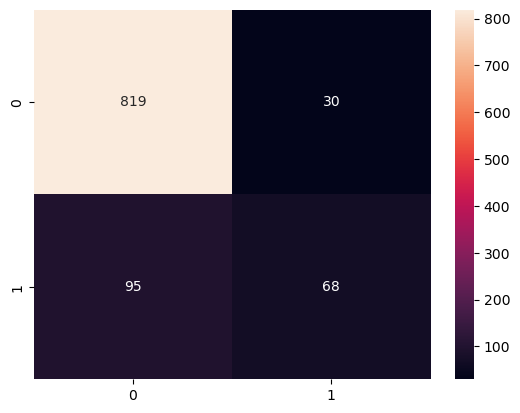

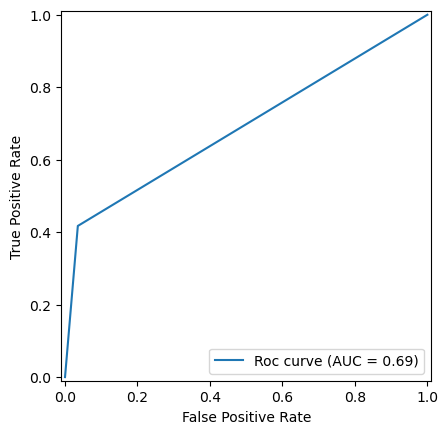

In [93]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       849
           1       0.71      0.33      0.45       163

    accuracy                           0.87      1012
   macro avg       0.80      0.65      0.69      1012
weighted avg       0.86      0.87      0.85      1012

Accuracy score: 0.8705533596837944


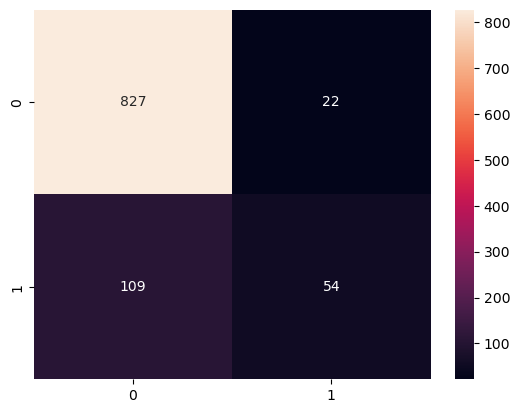

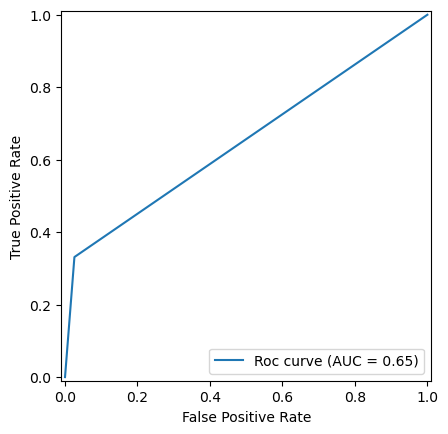

In [94]:
# support vector machines
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       849
           1       0.82      0.88      0.85       163

    accuracy                           0.95      1012
   macro avg       0.90      0.92      0.91      1012
weighted avg       0.95      0.95      0.95      1012

Accuracy score: 0.9496047430830039


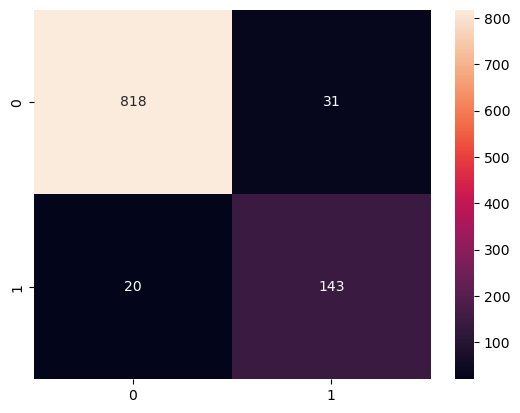

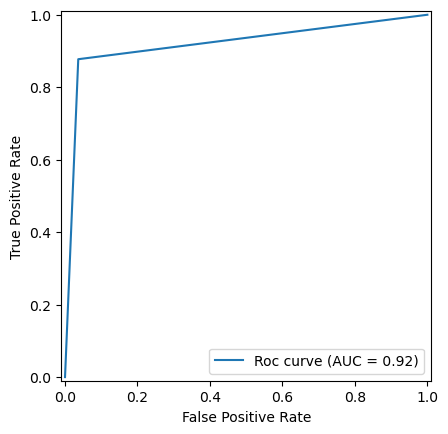

In [101]:
# decision tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

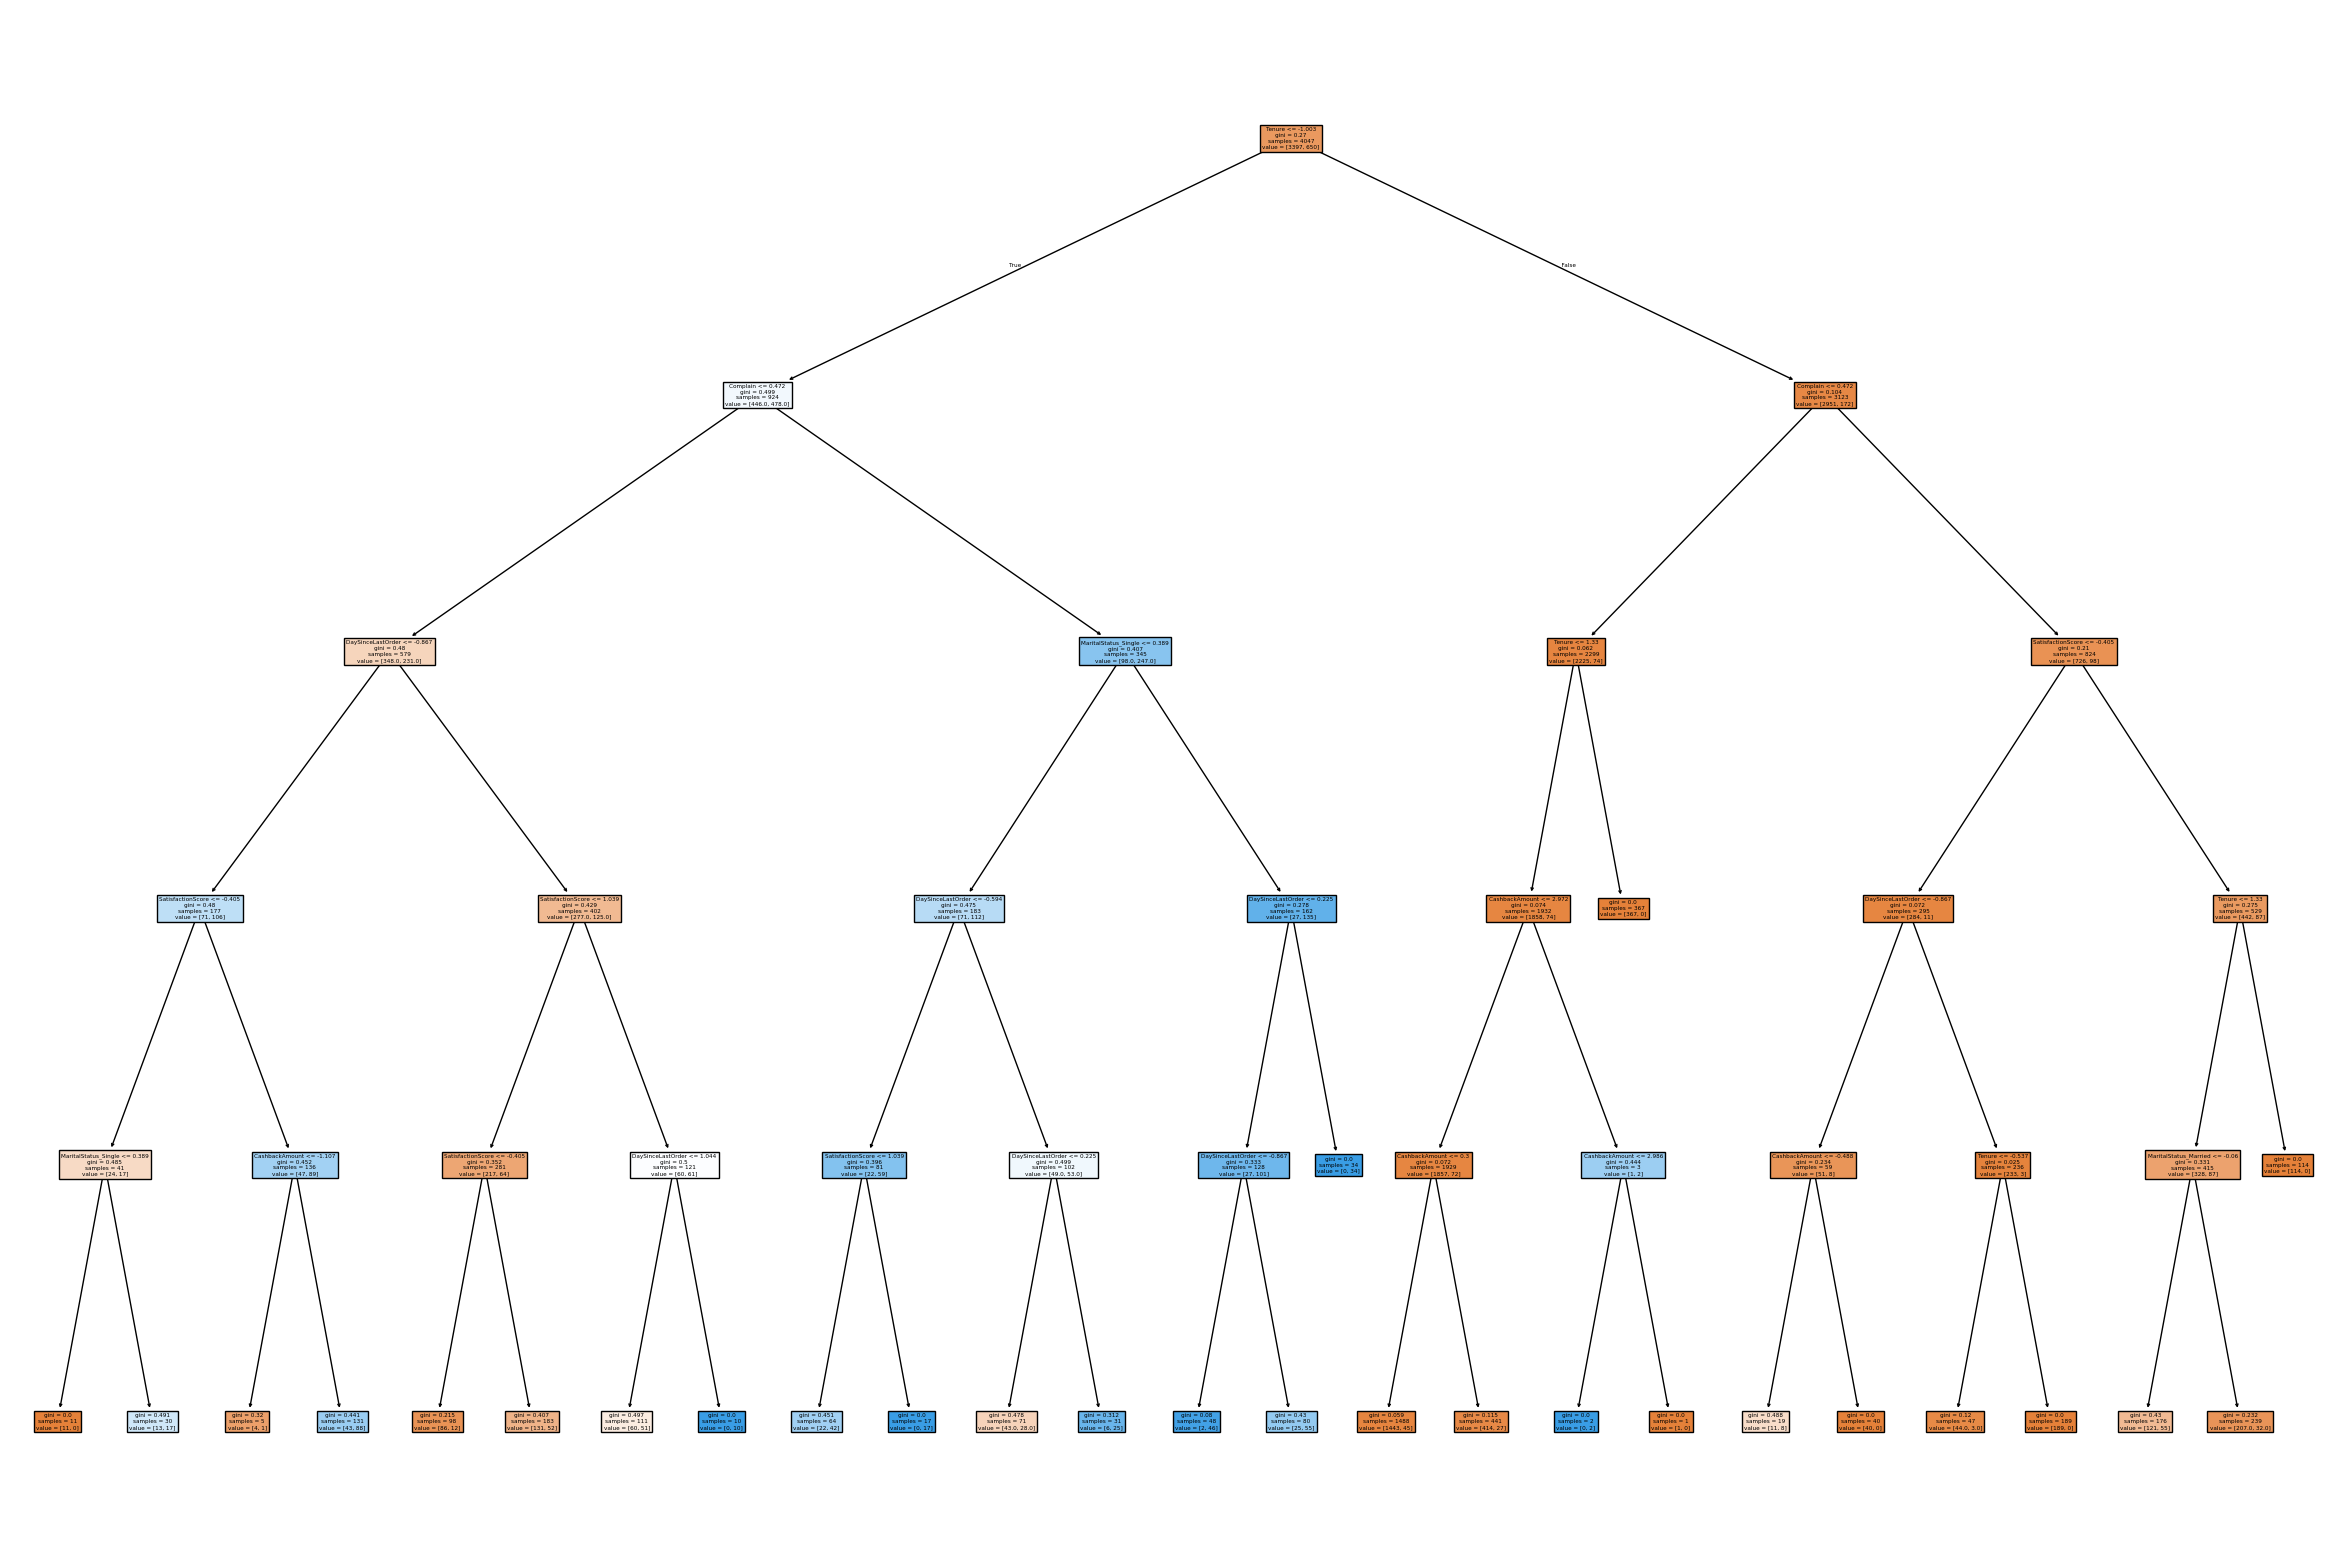

In [100]:
cols = encoded.drop('Churn', axis=1).columns

plt.figure(figsize=(30, 20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       849
           1       0.89      0.79      0.83       163

    accuracy                           0.95      1012
   macro avg       0.92      0.88      0.90      1012
weighted avg       0.95      0.95      0.95      1012

Accuracy score: 0.9496047430830039


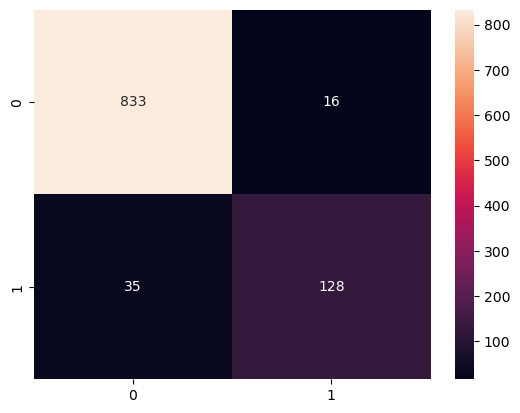

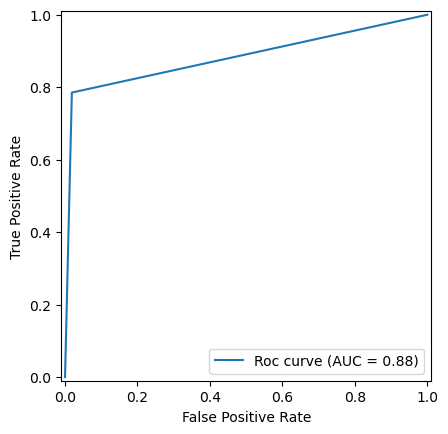

In [104]:
# random forest model
RV_model = RandomForestClassifier(n_estimators=10)
RV_model.fit(X_train, y_train)

y_pred = RV_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       849
           1       0.92      0.85      0.88       163

    accuracy                           0.96      1012
   macro avg       0.95      0.92      0.93      1012
weighted avg       0.96      0.96      0.96      1012

Accuracy score: 0.9634387351778656


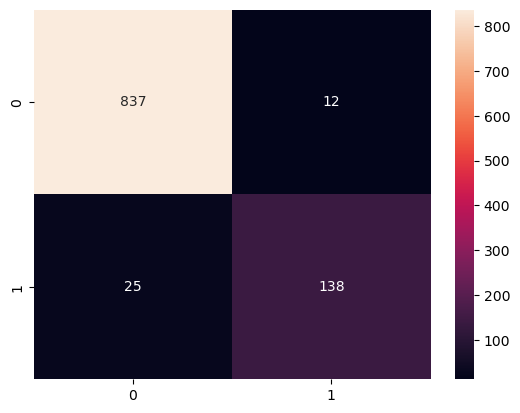

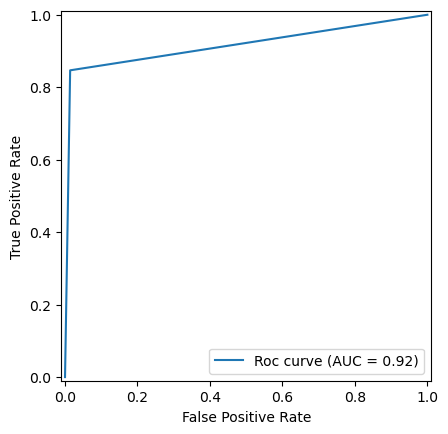

In [106]:
# xgboost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc curve')
display.plot()
plt.show()